## \\(k_2\\) Study

In [1]:
# Boilerplate
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
from ClassExpoSin import *

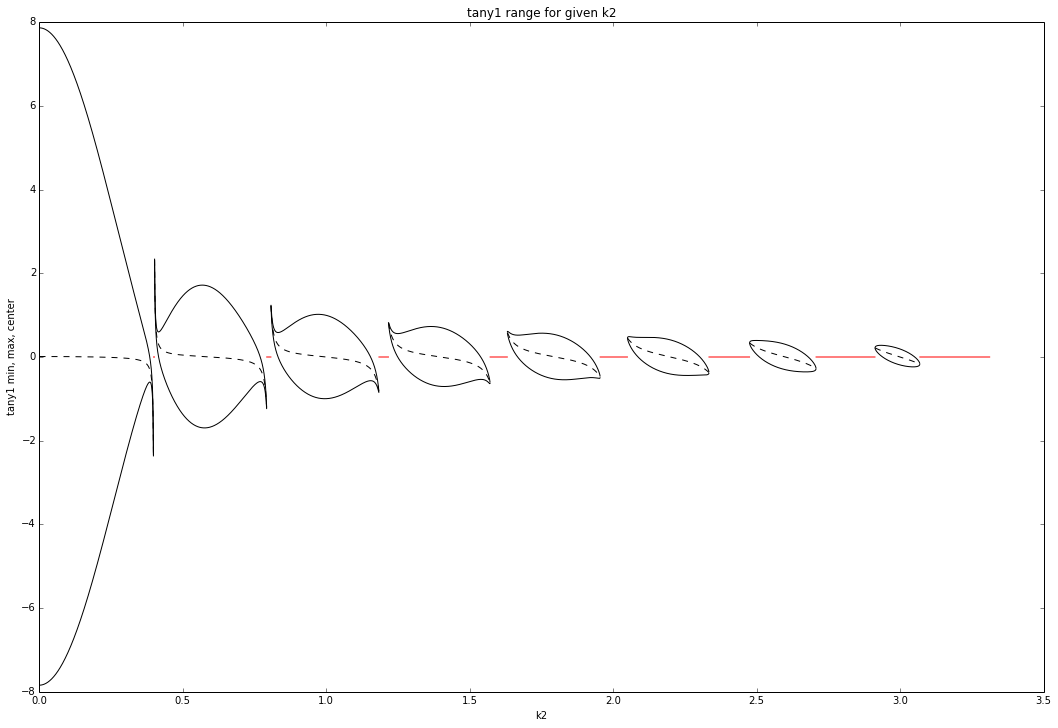

In [42]:
def k2_simple_range(r1, r2):
    """The possible-k2 domain falls within this range."""
    return -math.pow(4/math.log(r1/r2)**2, 0.25), math.pow(4/math.log(r1/r2)**2, 0.25)
def check_k2_possible(k2, r1, r2, psi):
    """Check that delta in equation 11 is positive."""
    return 0 <= 2 * (1 - math.cos(k2 * psi)) / k2**4 - math.log(r1 / r2)**2

def tany1r(k2, r1, r2, psi):
    logr1r2 = math.log(r1 / r2)
    cosk2O = math.cos(k2 * psi)
    delta = 2*(1-cosk2O)/k2**4 - logr1r2**2
    if delta < 0: # no feasible trajectories
        return [None, None, None]
    tany1mid = k2/2 * (-logr1r2 / math.tan(k2*psi/2))
    tany1min = k2/2 * (-logr1r2 / math.tan(k2*psi/2) - math.sqrt(delta))
    tany1max = k2/2 * (-logr1r2 / math.tan(k2*psi/2) + math.sqrt(delta))
    return (tany1min, tany1max, tany1mid)

r1 = 1.0
r2 = 1.2
psi = 5*math.pi

k2s = linspace(0.001, k2_simple_range(r1,r2)[1], 10000)
xlabel('k2')
ylabel('tany1 min, max, center')
title('tany1 range for given k2')
# Plot where no valid tany1 exists (thus k2 impossible)
plot(k2s, [None if check_k2_possible(k2,r1,r2,psi) else 0 for k2 in k2s], 'r')
# Plot tany1 range
plot(k2s, [tany1r(k2,r1,r2,psi)[0] for k2 in k2s], 'k')
plot(k2s, [tany1r(k2,r1,r2,psi)[1] for k2 in k2s], 'k')
plot(k2s, [tany1r(k2,r1,r2,psi)[2] for k2 in k2s], 'k--')

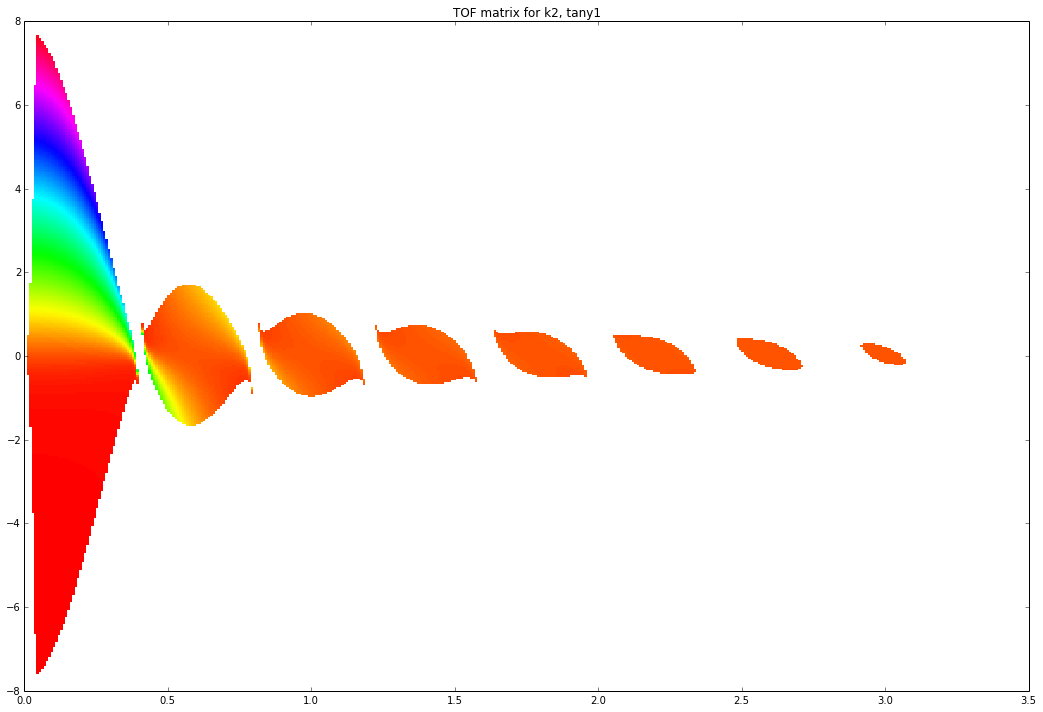

In [45]:
k2s = linspace(0.001,k2_simple_range(r1,r2)[1],400)
tany1s = linspace(-8.0,8.0,400)
k2s, tany1s = meshgrid(k2s, tany1s)

@np.vectorize
def dt(k2, tany1):
    try:
        clss = ClassExpoSin(k2, r1, r2, psi)
        mintany1, maxtany1 = clss.tany1Range()
        extinct = 0.99
        if tany1 > maxtany1 * extinct or tany1 < mintany1 * extinct:
            return np.nan
        exps = clss.createExpoSin(tany1)
        return math.log(exps.dT(psi, 1.0))
    except:
        return np.nan

dts = dt(k2s,tany1s)

mdts = np.ma.array(dts, mask=np.isnan(dts))
cmap = cm.hsv
cmap.set_bad('w',1.0)

fig = plt.figure()
ax = fig.gca()
ax.set_title('TOF matrix for k2, tany1')
surf = ax.pcolor(k2s, tany1s, mdts, cmap=cmap, vmin=np.nanmin(dts), vmax=np.nanmax(dts))
plt.show()